In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

In [2]:
def get_data(name):
    train_name = name+'_train_new.csv'
    test_name = 'test_'+name+'_round2.csv'
    train_data_path = os.path.join(path, train_name)
    test_data_path = os.path.join(path, test_name)
    train_data = pd.read_csv('../'+train_data_path)
    test_data = pd.read_csv('../'+test_data_path)
    train_data = pd.concat([train_data, test_data], axis=0, ignore_index=True, sort=False)
    if name=='tag':
        train_data.loc[train_data['Tag']==0.5, 'Tag']=-1
        train_data['Tag'] = train_data['Tag'].astype(int)
    return train_data

In [3]:
path = os.path.join(os.path.dirname('__file__'),'data')

operation_data = get_data(name='operation')
transaction_data = get_data(name='transaction')
tag = get_data(name='tag')

print(operation_data.shape)
print(transaction_data.shape)
print(tag.shape)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


(2601421, 20)
(393036, 27)
(62767, 2)


In [4]:
op_data = pd.merge(operation_data, tag, on='UID', how='left')
tr_data = pd.merge(transaction_data, tag, on='UID', how='left')

print(op_data.shape)
print(tr_data.shape)

(2601421, 21)
(393036, 28)


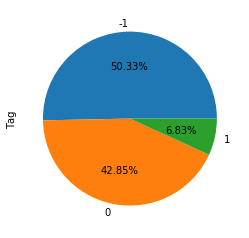

In [5]:
tag['Tag'].value_counts().plot.pie(autopct = '%1.2f%%')

# Operation

In [6]:
op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,...,device_code3,mac1,mac2,ip1,ip2,wifi,geo_code,ip1_sub,ip2_sub,Tag
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102.0,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,...,NaN,NaN,a8dc52f65085212e,55dd8936655c86f6,NaN,NaN,wskx,e58e48fb9215116e,NaN,0
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,NaN,3502c553ea2ac187,0
2,13162,8,b668e42707ee9c7b,0.0,18:09:57,102.0,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,...,NaN,a8dc52f65085212e,NaN,2147d925e7a8ba3c,NaN,NaN,NaN,3591678eca3f7a23,NaN,0
3,21392,23,c8741ce15ceac2a4,1.0,23:53:49,102.0,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,...,NaN,NaN,04a2d6c090518faa,c52efc665f0af581,NaN,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,NaN,0
4,18599,26,acfaded7e04e7ba0,1.0,11:11:15,102.0,7.0.0,8399be6b80847240,NaN,27efd832595503f6,...,NaN,NaN,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,NaN,f5009e2c6c13c80c,NaN,1


In [7]:
op_data.loc[op_data['device_code1'].isnull(),'device_code1'] = op_data[op_data['device_code1'].isnull()]['device_code2']
op_data.loc[op_data['device_code1'].isnull(),'device_code1'] = op_data[op_data['device_code1'].isnull()]['device_code3']
op_data = op_data.drop(['device_code2','device_code3'],axis=1)

In [8]:
op_data.loc[op_data['ip1'].isnull(),'ip1'] = op_data[op_data['ip1'].isnull()]['ip2']
op_data = op_data.drop(['ip2'],axis=1)

In [9]:
op_data.loc[op_data['ip1_sub'].isnull(),'ip1_sub'] = op_data[op_data['ip1_sub'].isnull()]['ip2_sub']
op_data = op_data.drop(['ip2_sub'],axis=1)

In [10]:
op_data.loc[op_data['mac2'].isnull(),'mac2'] = op_data[op_data['mac2'].isnull()]['mac1']
op_data = op_data.drop(['mac1'],axis=1)

In [11]:
op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,mac2,ip1,wifi,geo_code,ip1_sub,Tag
0,10035,30,c8741ce15ceac2a4,1.0,17:51:50,102.0,7.0.9,49dd36968dbfadda,OPPO R11,ecb58082e0e9b8e2,a8dc52f65085212e,55dd8936655c86f6,NaN,wskx,e58e48fb9215116e,0
1,16264,16,20a91b45ef8f8221,1.0,08:36:00,200.0,NaN,NaN,NaN,NaN,NaN,fc7fc47d6c93f554,NaN,NaN,3502c553ea2ac187,0
2,13162,8,b668e42707ee9c7b,0.0,18:09:57,102.0,7.0.5,630a1adff2a87007,MI MAX 2,1da225cb679a37eb,a8dc52f65085212e,2147d925e7a8ba3c,NaN,NaN,3591678eca3f7a23,0
3,21392,23,c8741ce15ceac2a4,1.0,23:53:49,102.0,7.0.9,630a1adff2a87007,MI 5X,d0c285513b785609,04a2d6c090518faa,c52efc665f0af581,4ff1553b1c96360e,wm4v,fdb5e20f6a6f2cd7,0
4,18599,26,acfaded7e04e7ba0,1.0,11:11:15,102.0,7.0.0,8399be6b80847240,NaN,27efd832595503f6,1ab9dc3eae102aa6,0fe293bea342665a,NaN,NaN,f5009e2c6c13c80c,1


In [12]:
cols = ['mode', 'os',  'device2',  'geo_code', 'ip1_sub','version', 'mac2','device1', 'device_code1', 'ip1', 'wifi']
for col in cols:
    op_data[col] = pd.factorize(op_data[col])[0]
op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,mac2,ip1,wifi,geo_code,ip1_sub,Tag
0,10035,30,0,1.0,17:51:50,0,0,0,0,0,0,0,-1,0,0,0
1,16264,16,1,1.0,08:36:00,1,-1,-1,-1,-1,-1,1,-1,-1,1,0
2,13162,8,2,0.0,18:09:57,0,1,1,1,1,0,2,-1,-1,2,0
3,21392,23,0,1.0,23:53:49,0,0,1,2,2,1,3,0,1,3,0
4,18599,26,3,1.0,11:11:15,0,2,2,-1,3,2,4,-1,-1,4,1


In [13]:
from datetime import datetime
op_data['hour'] = op_data.time.str[0:2].astype(int)

op_data['time'] = pd.to_datetime(op_data['time'])
op_data['time'] = op_data['time'].apply(lambda x:(x-datetime.now()).seconds/3600)

op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,mac2,ip1,wifi,geo_code,ip1_sub,Tag,hour
0,10035,30,0,1.0,8.401944,0,0,0,0,0,0,0,-1,0,0,0,17
1,16264,16,1,1.0,23.138056,1,-1,-1,-1,-1,-1,1,-1,-1,1,0,8
2,13162,8,2,0.0,8.703889,0,1,1,1,1,0,2,-1,-1,2,0,18
3,21392,23,0,1.0,14.435000,0,0,1,2,2,1,3,0,1,3,0,23
4,18599,26,3,1.0,1.725556,0,2,2,-1,3,2,4,-1,-1,4,1,11


In [14]:
op_data_na = op_data.replace(-1,np.nan)
op_data_na = (op_data_na.isnull().sum()/len(op_data_na)) * 100
op_data_na = op_data_na.drop(op_data_na[op_data_na == 0].index).sort_values(ascending = True)
missing_op_data = pd.DataFrame({'missing ratio': op_data_na})
print("the number of missing item: {}".format(len(missing_op_data)))
missing_op_data

the number of missing item: 11


,missing ratio
success,3.885569
ip1,5.294568
ip1_sub,5.294568
device1,9.700967
version,9.744328
device_code1,9.750632
device2,18.583228
mac2,22.934581
geo_code,29.089371
Tag,43.844422


In [15]:
op_data_temp = op_data
op_data_temp.shape

(2601421, 17)

In [16]:
# op_data = op_data_temp

In [17]:
op_data = op_data.merge(op_data.groupby(['hour'])['success'].agg({'hour'+'_success_count':'count'}).reset_index(),on='hour',how='left')
op_data = op_data.merge(op_data.groupby(['hour'])['success'].agg({'hour'+'_success_sum':'sum'}).reset_index(),on='hour',how='left')
op_data['hour_rate'] = op_data['hour_success_sum']/op_data['hour_success_count']
op_data.shape

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


(2601421, 20)

In [18]:
op_data = op_data.merge(op_data.groupby(['mode'])['success'].agg({'mode'+'_success_count':'count'}).reset_index(),on='mode',how='left')
op_data = op_data.merge(op_data.groupby(['mode'])['success'].agg({'mode'+'_success_sum':'sum'}).reset_index(),on='mode',how='left')
op_data['mode_rate'] = op_data['mode_success_sum']/op_data['mode_success_count']
op_data.shape

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


(2601421, 23)

In [19]:
op_data = op_data.fillna(-1)

In [20]:
op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,...,geo_code,ip1_sub,Tag,hour,hour_success_count,hour_success_sum,hour_rate,mode_success_count,mode_success_sum,mode_rate
0,10035,30,0,1.0,8.401944,0,0,0,0,0,...,0,0,0,17,154890,144828.0,0.935038,1568761,1541428.0,0.982577
1,16264,16,1,1.0,23.138056,1,-1,-1,-1,-1,...,-1,1,0,8,160031,151722.0,0.948079,20231,20155.0,0.996243
2,13162,8,2,0.0,8.703889,0,1,1,1,1,...,-1,2,0,18,141766,133204.0,0.939605,3203,2372.0,0.740556
3,21392,23,0,1.0,14.435000,0,0,1,2,2,...,1,3,0,23,47934,45250.0,0.944006,1568761,1541428.0,0.982577
4,18599,26,3,1.0,1.725556,0,2,2,-1,3,...,-1,4,1,11,177504,167205.0,0.941979,99456,66141.0,0.665028


In [21]:
#统计特征
def get_category_uid(data_set,feature):
    
    data_set = data_set.merge(data_set.groupby([feature])['UID'].agg({feature+'_nunique':'nunique'}).reset_index(),on=feature,how='left')
    
    data_set = data_set.merge(data_set.groupby([feature])['UID'].agg({feature+'_count':'count'}).reset_index(),on=feature,how='left')

    return data_set

In [22]:
#day
print('day...')
op_data = get_category_uid(op_data, 'day')
#hour
print('hour...')
op_data = get_category_uid(op_data, 'hour')
##mode
print('mode...')
op_data = get_category_uid(op_data, 'mode')
#success
print('success...')
op_data = get_category_uid(op_data, 'success')
#os
print('os...')
op_data = get_category_uid(op_data, 'os')
#version
print('version...')
op_data = get_category_uid(op_data, 'version')
#device1
print('device1...')
op_data = get_category_uid(op_data, 'device1')
#device2
print('device2...')
op_data = get_category_uid(op_data, 'device2')
#mac2
print('mac2...')
op_data = get_category_uid(op_data, 'mac2')
#geo_code
print('geo_code...')
op_data = get_category_uid(op_data, 'geo_code')
#ip1_sub
print('ip1_sub...')
op_data = get_category_uid(op_data, 'ip1_sub')
#ip1
print('ip1...')
op_data = get_category_uid(op_data, 'ip1')
#wifi
print('wifi...')
op_data = get_category_uid(op_data, 'wifi')
#device_code
print('device_code1...')
op_data = get_category_uid(op_data, 'device_code1')

print(op_data.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


hour...
mode...
success...
os...
version...
device1...
device2...
mac2...
geo_code...
ip1_sub...
ip1...
wifi...
device_code1...
(2601421, 51)


In [23]:
op_data.head()

,UID,day,mode,success,time,os,version,device1,device2,device_code1,...,geo_code_nunique,geo_code_count,ip1_sub_nunique,ip1_sub_count,ip1_nunique,ip1_count,wifi_nunique,wifi_count,device_code1_nunique,device_code1_count
0,10035,30,0,1.0,8.401944,0,0,0,0,0,...,20,537,147,2204,2,6,59728,1718714,1,112
1,16264,16,1,1.0,23.138056,1,-1,-1,-1,-1,...,46328,756737,52,364,1,12,59728,1718714,17172,253655
2,13162,8,2,0.0,8.703889,0,1,1,1,1,...,46328,756737,5,47,1,5,59728,1718714,1,15
3,21392,23,0,1.0,14.435000,0,0,1,2,2,...,35,1913,3,19,1,5,1,14,1,49
4,18599,26,3,1.0,1.725556,0,2,2,-1,3,...,46328,756737,207,11913,207,11913,59728,1718714,1,112


In [24]:
n_train_x = 1460843

train_x1 = op_data[:n_train_x]
test_x1 = op_data[n_train_x:]
print(train_x1.shape)
print(test_x1.shape)

(1460843, 51)
(1140578, 51)


# Transaction

In [25]:
# tr_data = pd.merge(transaction_data, tag, on='UID', how='left')

In [26]:
tr_data.head()

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,bal,amt_src2,acc_id2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub,Tag
0,19092,102,30,11:48:47,1459,acdbdb842ac20f1e,abc6bc660561e0eb,NaN,NaN,26bcf43a19df14c8,...,1007,9fefed0a981dcb7a,NaN,NaN,wsbq,102.0,2ecf94369847c748,1.0,45f4ca1f4e9b9cb7,0
1,13465,140,23,16:58:03,725,4d7831c6f695ab19,7a87b1aa20972d48,NaN,NaN,c2f2023d279665b2,...,100,NaN,NaN,NaN,wte7,105.0,NaN,NaN,2b416f1d7e89ad3b,0
2,13713,140,22,09:56:39,127,c5fc631370cabc0d,cfd035fc7e0a53b2,NaN,NaN,c2f2023d279665b2,...,100,NaN,NaN,NaN,ws7n,105.0,NaN,NaN,ff71a556d86c4b8f,0
3,22703,140,1,18:11:45,99317,a571c7fda8b7df37,c71c876b8979028e,NaN,NaN,c2f2023d279665b2,...,100,fbf6bf3c8927414c,NaN,NaN,wqj6,NaN,NaN,NaN,cf1527a0b4173e8f,0
4,17816,140,22,13:04:02,3361,c5fc631370cabc0d,6628f5ca013e3582,NaN,NaN,c2f2023d279665b2,...,100,NaN,NaN,NaN,NaN,105.0,NaN,NaN,cbc62c2b1cb7deb9,0


In [27]:
tr_data.loc[tr_data['device_code1'].isnull(),'device_code1'] = tr_data[tr_data['device_code1'].isnull()]['device_code2']
tr_data.loc[tr_data['device_code1'].isnull(),'device_code1'] = tr_data[tr_data['device_code1'].isnull()]['device_code3']
tr_data = tr_data.drop(['device_code2','device_code3'],axis=1)

In [28]:
tr_data = tr_data.drop(['acc_id2'],axis=1)

In [29]:
cols_f = ['amt_src1', 'trans_type1','amt_src2','geo_code','ip1_sub','mac1','merchant','acc_id3','channel','market_type','trans_type2','code1','code2','market_code','ip1','device1','device_code1','acc_id1','device2']
for col in cols_f:
    tr_data[col] = pd.factorize(tr_data[col])[0]
tr_data.head()

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,ip1,bal,amt_src2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub,Tag
0,19092,0,30,11:48:47,1459,0,0,-1,-1,0,...,0,1007,0,-1,0,0,0,0,0,0
1,13465,1,23,16:58:03,725,1,1,-1,-1,1,...,1,100,-1,-1,1,1,-1,-1,1,0
2,13713,1,22,09:56:39,127,2,2,-1,-1,1,...,2,100,-1,-1,2,1,-1,-1,2,0
3,22703,1,1,18:11:45,99317,3,3,-1,-1,1,...,3,100,1,-1,3,-1,-1,-1,3,0
4,17816,1,22,13:04:02,3361,2,4,-1,-1,1,...,4,100,-1,-1,-1,1,-1,-1,4,0


In [30]:
tr_data['hour'] = tr_data.time.str[0:2].astype(int)

tr_data['time'] = pd.to_datetime(tr_data['time'])
tr_data['time'] = tr_data['time'].apply(lambda x:(x-datetime.now()).seconds/3600)

tr_data.head()

,UID,channel,day,time,trans_amt,amt_src1,merchant,code1,code2,trans_type1,...,bal,amt_src2,acc_id3,geo_code,trans_type2,market_code,market_type,ip1_sub,Tag,hour
0,19092,0,30,2.228611,1459,0,0,-1,-1,0,...,1007,0,-1,0,0,0,0,0,0,11
1,13465,1,23,7.383056,725,1,1,-1,-1,1,...,100,-1,-1,1,1,-1,-1,1,0,16
2,13713,1,22,0.359722,127,2,2,-1,-1,1,...,100,-1,-1,2,1,-1,-1,2,0,9
3,22703,1,1,8.611389,99317,3,3,-1,-1,1,...,100,1,-1,3,-1,-1,-1,3,0,18
4,17816,1,22,3.482778,3361,2,4,-1,-1,1,...,100,-1,-1,-1,1,-1,-1,4,0,13


In [31]:
tr_data_na = tr_data.replace(-1,np.nan)
tr_data_na = (tr_data_na.isnull().sum()/len(tr_data_na)) * 100
tr_data_na = tr_data_na.drop(tr_data_na[tr_data_na == 0].index).sort_values(ascending = True)
missing_tr_data = pd.DataFrame({'missing ratio': tr_data_na})
print("the number of missing item: {}".format(len(missing_tr_data)))
missing_tr_data

the number of missing item: 17


,missing ratio
merchant,0.999400
ip1_sub,9.853550
ip1,9.853550
device2,10.180747
device_code1,11.912649
device1,12.342635
geo_code,20.262775
trans_type2,21.130380
mac1,30.737388
Tag,32.664183


In [32]:
tr_data = tr_data.fillna(-1)

In [33]:
tr_data_temp = tr_data
tr_data_temp.shape

(393036, 26)

In [34]:
tr_data = tr_data.merge(tr_data.groupby(['channel'])['trans_amt'].agg({'channel'+'trans_sum':'sum'}).reset_index(),on='channel',how='left')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [35]:
#day
print('day...')
tr_data = get_category_uid(tr_data, 'day')
#hour
print('hour...')
tr_data = get_category_uid(tr_data, 'hour')
#channel
print('channel...')
tr_data = get_category_uid(tr_data, 'channel')
#merchant
print('merchant...')
tr_data = get_category_uid(tr_data, 'merchant')
#amt_src1
print('amt_src1...')
tr_data = get_category_uid(tr_data, 'amt_src1')
#amt_src2
print('amt_src2...')
tr_data = get_category_uid(tr_data, 'amt_src2')
# #code1
# print('code1...')
# tr_data = get_category_uid(tr_data, 'code1')
# #code2
# print('code2...')
# tr_data = get_category_uid(tr_data, 'code2')
#device1
print('device1...')
tr_data = get_category_uid(tr_data, 'device1')
#device2
print('device2...')
tr_data = get_category_uid(tr_data, 'device2')
#mac1
print('mac1...')
tr_data = get_category_uid(tr_data, 'mac1')
#geo_code
print('geo_code...')
tr_data = get_category_uid(tr_data, 'geo_code')
#ip1_sub
print('ip1_sub...')
tr_data = get_category_uid(tr_data, 'ip1_sub')
#ip1
print('ip1...')
tr_data = get_category_uid(tr_data, 'ip1')
#acc_id1
print('acc_id1...')
tr_data = get_category_uid(tr_data, 'acc_id1')
# #acc_id3
# print('acc_id3...')
# tr_data = get_category_uid(tr_data, 'acc_id3')
#device_code1
print('device_code1...')
tr_data = get_category_uid(tr_data, 'device_code1')
#trans_type1
print('trans_type1...')
tr_data = get_category_uid(tr_data, 'trans_type1')
#trans_type2
print('trans_type2...')
tr_data = get_category_uid(tr_data, 'trans_type2')
# #market_type
# print('market_type...')
# tr_data = get_category_uid(tr_data, 'market_type')
# #market_code
# print('market_code...')
# tr_data = get_category_uid(tr_data, 'market_code')

print(tr_data.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


hour...
channel...
merchant...
amt_src1...
amt_src2...
device1...
device2...
mac1...
geo_code...
ip1_sub...
ip1...
acc_id1...
device_code1...
trans_type1...
trans_type2...
(393036, 59)


In [36]:
n_train_x2 = 264654

train_x2 = tr_data[:n_train_x2]
test_x2 = tr_data[n_train_x2:]
print(train_x2.shape)
print(test_x2.shape)

(264654, 59)
(128382, 59)


# Merge

In [37]:
#类别型变量
def get_category_feature(data_set,feature,train_y):
    
    train_y = train_y.merge(data_set.groupby(['UID'])[feature].agg(lambda x: x.value_counts().index[0]).reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].max().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].nunique().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].min().reset_index(),on='UID',how='left')
    
    train_y = train_y.merge(data_set.groupby(['UID'])[feature].sum().reset_index(),on='UID',how='left')

    return train_y

In [38]:
#数值型变量
def get_numerical_feature(data_set,feature,train_y):
    
    train_y = train_y.merge(data_set.groupby(['UID'])[feature].var().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].mad().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].sum().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].mean().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].min().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].median().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].max().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].std().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].skew().reset_index(),on='UID',how='left')

    train_y = train_y.merge(data_set.groupby(['UID'])[feature].agg(lambda x: x.value_counts().index[0]).reset_index(),on='UID',how='left')

    return train_y

In [39]:
#op_data merge
train_y = pd.read_csv('../data/tag_train_new.csv')

In [40]:
train_x1.columns

Index(['UID', 'day', 'mode', 'success', 'time', 'os', 'version', 'device1',
       'device2', 'device_code1', 'mac2', 'ip1', 'wifi', 'geo_code', 'ip1_sub',
       'Tag', 'hour', 'hour_success_count', 'hour_success_sum', 'hour_rate',
       'mode_success_count', 'mode_success_sum', 'mode_rate', 'day_nunique',
       'day_count', 'hour_nunique', 'hour_count', 'mode_nunique', 'mode_count',
       'success_nunique', 'success_count', 'os_nunique', 'os_count',
       'version_nunique', 'version_count', 'device1_nunique', 'device1_count',
       'device2_nunique', 'device2_count', 'mac2_nunique', 'mac2_count',
       'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'wifi_nunique',
       'wifi_count', 'device_code1_nunique', 'device_code1_count'],
      dtype='object')

In [41]:
#day
print('day...')
op_train = train_y.merge(train_x1.groupby(['UID'])['day'].agg({'count':'count'}).reset_index(),on='UID',how='left')
op_train = get_category_feature(train_x1, 'day', op_train)
##mode
print('mode...')
op_train = get_category_feature(train_x1, 'mode', op_train)
#success
print('success...')
op_train = get_category_feature(train_x1, 'success', op_train)
#os
print('os...')
op_train = get_category_feature(train_x1, 'os', op_train)
#version
print('version...')
op_train = get_category_feature(train_x1, 'version', op_train)
#device1
print('device1...')
op_train = get_category_feature(train_x1, 'device1', op_train)
#device2
print('device2...')
op_train = get_category_feature(train_x1, 'device2', op_train)
#device_code1
print('device_code1...')
op_train = get_category_feature(train_x1, 'device_code1', op_train)
#mac2
print('mac2...')
op_train = get_category_feature(train_x1, 'mac2', op_train)
#geo_code
print('geo_code...')
op_train = get_category_feature(train_x1, 'geo_code', op_train)
#ip1_sub
print('ip1_sub...')
op_train = get_category_feature(train_x1, 'ip1_sub', op_train)
#ip1
print('ip1...')
op_train = get_category_feature(train_x1, 'ip1', op_train)
#wifi
print('wifi...')
op_train = get_category_feature(train_x1, 'wifi', op_train)
#time
print('time...')
op_train = get_numerical_feature(train_x1, 'time', op_train)
print(op_train.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


mode...
success...
os...
version...
device1...
device2...
device_code1...
mac2...
geo_code...
ip1_sub...
ip1...
wifi...
time...
(31179, 78)


In [42]:
cols = [ 'hour_rate','mode_rate']
for col in cols:
    print(col)
    op_train = get_numerical_feature(train_x1, col, op_train)
print(op_train.shape)

hour_rate
mode_rate
(31179, 98)


In [43]:
cols = ['hour_success_count', 'hour_success_sum', 'mode_success_count', 'mode_success_sum',  'day_nunique',
       'day_count', 'hour_nunique', 'hour_count', 'mode_nunique', 'mode_count',
       'success_nunique', 'success_count', 'os_nunique', 'os_count',
       'version_nunique', 'version_count', 'device1_nunique', 'device1_count',
       'device2_nunique', 'device2_count', 'mac2_nunique', 'mac2_count',
       'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'wifi_nunique',
       'wifi_count', 'device_code1_nunique', 'device_code1_count']
for col in cols:
    print(col)
    op_train = get_category_feature(train_x1, col, op_train)
print(op_train.shape)

hour_success_count
hour_success_sum
mode_success_count
mode_success_sum
day_nunique
day_count
hour_nunique
hour_count
mode_nunique
mode_count
success_nunique
success_count
os_nunique
os_count
version_nunique
version_count
device1_nunique
device1_count
device2_nunique
device2_count
mac2_nunique
mac2_count
geo_code_nunique
geo_code_count
ip1_sub_nunique
ip1_sub_count
ip1_nunique
ip1_count
wifi_nunique
wifi_count
device_code1_nunique
device_code1_count
(31179, 258)


In [44]:
op_train.head()

,UID,Tag,count,day_x,day_y,day_x,day_y,day,mode_x,mode_y,...,device_code1_nunique_x,device_code1_nunique_y,device_code1_nunique_x,device_code1_nunique_y,device_code1_nunique,device_code1_count_x,device_code1_count_y,device_code1_count_x,device_code1_count_y,device_code1_count
0,10000,1,9.0,26.0,26.0,2.0,13.0,182.0,0.0,34.0,...,1.0,1.0,1.0,1.0,9.0,9.0,9.0,1.0,9.0,81.0
1,10001,0,67.0,3.0,13.0,8.0,2.0,437.0,0.0,29.0,...,1.0,17172.0,2.0,1.0,326316.0,48.0,253655.0,2.0,48.0,4821749.0
2,10002,0,11.0,29.0,29.0,1.0,29.0,319.0,5.0,34.0,...,1.0,17172.0,2.0,1.0,17182.0,10.0,253655.0,2.0,10.0,253755.0
3,10003,0,15.0,17.0,17.0,1.0,17.0,255.0,0.0,5.0,...,1.0,1.0,1.0,1.0,15.0,15.0,15.0,1.0,15.0,225.0
4,10004,0,34.0,8.0,29.0,6.0,1.0,430.0,0.0,26.0,...,1.0,1.0,1.0,1.0,34.0,34.0,34.0,1.0,34.0,1156.0


In [45]:
test_y = pd.read_csv('../data/example.csv')

In [46]:
#day
print('day...')
op_test = test_y.merge(test_x1.groupby(['UID'])['day'].agg({'count':'count'}).reset_index(),on='UID',how='left')
op_test = get_category_feature(test_x1, 'day', op_test)
##mode
print('mode...')
op_test = get_category_feature(test_x1, 'mode', op_test)
#success
print('success...')
op_test = get_category_feature(test_x1, 'success', op_test)
#os
print('os...')
op_test = get_category_feature(test_x1, 'os', op_test)
#version
print('version...')
op_test = get_category_feature(test_x1, 'version', op_test)
#device1
print('device1...')
op_test = get_category_feature(test_x1, 'device1', op_test)
#device2
print('device2...')
op_test = get_category_feature(test_x1, 'device2', op_test)
#device_code1
print('device_code1...')
op_test = get_category_feature(test_x1, 'device_code1', op_test)
#mac2
print('mac2...')
op_test = get_category_feature(test_x1, 'mac2', op_test)
#geo_code
print('geo_code...')
op_test = get_category_feature(test_x1, 'geo_code', op_test)
#ip1
print('ip1...')
op_test = get_category_feature(test_x1, 'ip1', op_test)
#wifi
print('wifi...')
op_test = get_category_feature(test_x1, 'wifi', op_test)
#ip1_sub
print('ip1_sub...')
op_test = get_category_feature(test_x1, 'ip1_sub', op_test)
#time
print('time...')
op_test = get_numerical_feature(test_x1, 'time', op_test)
print(op_test.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


mode...
success...
os...
version...
device1...
device2...
device_code1...
mac2...
geo_code...
ip1...
wifi...
ip1_sub...
time...
(31588, 78)


In [47]:
cols = ['hour_rate','mode_rate']
for col in cols:
    print(col)
    op_test = get_numerical_feature(test_x1, col, op_test)
print(op_test.shape)

hour_rate
mode_rate
(31588, 98)


In [48]:
cols = ['hour_success_count', 'hour_success_sum', 'mode_success_count', 'mode_success_sum',  'day_nunique',
       'day_count', 'hour_nunique', 'hour_count', 'mode_nunique', 'mode_count',
       'success_nunique', 'success_count', 'os_nunique', 'os_count',
       'version_nunique', 'version_count', 'device1_nunique', 'device1_count',
       'device2_nunique', 'device2_count', 'mac2_nunique', 'mac2_count',
       'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'wifi_nunique',
       'wifi_count', 'device_code1_nunique', 'device_code1_count']
for col in cols:
    print(col)
    op_test = get_category_feature(test_x1, col, op_test)
print(op_test.shape)

hour_success_count
hour_success_sum
mode_success_count
mode_success_sum
day_nunique
day_count
hour_nunique
hour_count
mode_nunique
mode_count
success_nunique
success_count
os_nunique
os_count
version_nunique
version_count
device1_nunique
device1_count
device2_nunique
device2_count
mac2_nunique
mac2_count
geo_code_nunique
geo_code_count
ip1_sub_nunique
ip1_sub_count
ip1_nunique
ip1_count
wifi_nunique
wifi_count
device_code1_nunique
device_code1_count
(31588, 258)


In [49]:
op_test.head()

,UID,Tag,count,day_x,day_y,day_x,day_y,day,mode_x,mode_y,...,device_code1_nunique_x,device_code1_nunique_y,device_code1_nunique_x,device_code1_nunique_y,device_code1_nunique,device_code1_count_x,device_code1_count_y,device_code1_count_x,device_code1_count_y,device_code1_count
0,100000,0.5,33.0,3.0,28.0,7.0,3.0,378.0,0.0,8.0,...,1.0,1.0,1.0,1.0,33.0,33.0,33.0,1.0,33.0,1089.0
1,100001,0.5,12.0,16.0,16.0,1.0,16.0,192.0,0.0,29.0,...,1.0,1.0,1.0,1.0,12.0,12.0,12.0,1.0,12.0,144.0
2,100002,0.5,46.0,22.0,29.0,6.0,1.0,695.0,0.0,26.0,...,1.0,1.0,1.0,1.0,46.0,46.0,46.0,1.0,46.0,2116.0
3,100003,0.5,7.0,19.0,19.0,1.0,19.0,133.0,3.0,33.0,...,1.0,1.0,1.0,1.0,7.0,7.0,7.0,1.0,7.0,49.0
4,100004,0.5,4.0,3.0,3.0,1.0,3.0,12.0,5.0,5.0,...,1.0,1.0,1.0,1.0,4.0,4.0,4.0,1.0,4.0,16.0


In [50]:
aa = op_train
aaa = aa.iloc[:,2:]
qq = np.array(aaa)
pp = pd.DataFrame(qq)
aaaa = aa.iloc[:,0:2]
aaaaa = pd.concat([aaaa,pp],axis=1)
cc = 0
for col in aaaaa.columns[2:]:
    aaaaa.rename(columns= {col: 'feature' + '_'+ str(cc)}, inplace=True)
    cc = cc + 1

bb = op_test
bbb = bb.iloc[:,2:]
qqq = np.array(bbb)
ppp = pd.DataFrame(qqq)
bbbb = bb.iloc[:,0:2]
bbbbb = pd.concat([bbbb,ppp],axis=1)
ccc = 0
for col in bbbbb.columns[2:]:
    bbbbb.rename(columns= {col: 'feature' + '_'+ str(ccc)}, inplace=True)
    ccc = ccc + 1  

op_train1 = aaaaa
op_test1 = bbbbb

op_test1.Tag = -1

all_data = pd.concat([op_train1, op_test1])

In [51]:
all_data.head()

,UID,Tag,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255
0,10000,1,9.0,26.0,26.0,2.0,13.0,182.0,0.0,34.0,...,1.0,1.0,1.0,1.0,9.0,9.0,9.0,1.0,9.0,81.0
1,10001,0,67.0,3.0,13.0,8.0,2.0,437.0,0.0,29.0,...,1.0,17172.0,2.0,1.0,326316.0,48.0,253655.0,2.0,48.0,4821749.0
2,10002,0,11.0,29.0,29.0,1.0,29.0,319.0,5.0,34.0,...,1.0,17172.0,2.0,1.0,17182.0,10.0,253655.0,2.0,10.0,253755.0
3,10003,0,15.0,17.0,17.0,1.0,17.0,255.0,0.0,5.0,...,1.0,1.0,1.0,1.0,15.0,15.0,15.0,1.0,15.0,225.0
4,10004,0,34.0,8.0,29.0,6.0,1.0,430.0,0.0,26.0,...,1.0,1.0,1.0,1.0,34.0,34.0,34.0,1.0,34.0,1156.0


In [52]:
op_train2 = all_data[all_data['Tag']!=-1]
op_test2 = all_data[all_data['Tag']==-1]
print(op_train2.shape)
print(op_test2.shape)

(31179, 258)
(31588, 258)


In [53]:
train_x2.columns

Index(['UID', 'channel', 'day', 'time', 'trans_amt', 'amt_src1', 'merchant',
       'code1', 'code2', 'trans_type1', 'acc_id1', 'device_code1', 'device1',
       'device2', 'mac1', 'ip1', 'bal', 'amt_src2', 'acc_id3', 'geo_code',
       'trans_type2', 'market_code', 'market_type', 'ip1_sub', 'Tag', 'hour',
       'channeltrans_sum', 'day_nunique', 'day_count', 'hour_nunique',
       'hour_count', 'channel_nunique', 'channel_count', 'merchant_nunique',
       'merchant_count', 'amt_src1_nunique', 'amt_src1_count',
       'amt_src2_nunique', 'amt_src2_count', 'device1_nunique',
       'device1_count', 'device2_nunique', 'device2_count', 'mac1_nunique',
       'mac1_count', 'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'acc_id1_nunique',
       'acc_id1_count', 'device_code1_nunique', 'device_code1_count',
       'trans_type1_nunique', 'trans_type1_count', 'trans_type2_nunique',
       'trans_type2_count'],
      dtype='object

In [54]:
#day
print('day...')
op_train3 = op_train2.merge(train_x2.groupby(['UID'])['day'].agg({'count':'count'}).reset_index(),on='UID',how='left')
op_train3 = get_category_feature(train_x2, 'day', op_train3)
#channel
print('channel...')
op_train3 = get_category_feature(train_x2, 'channel', op_train3)
# trans_amt
print('trans_amt...')
op_train3 = get_numerical_feature(train_x2, 'trans_amt', op_train3)
#merchant
print('merchant...')
op_train3 = get_category_feature(train_x2, 'merchant', op_train3)
#trans_type1
print('trans_type1...')
op_train3 = get_category_feature(train_x2, 'trans_type1', op_train3)
#mac1
print('mac1...')
op_train3 = get_category_feature(train_x2, 'mac1', op_train3)
#bal
print('bal...')
op_train3 = get_numerical_feature(train_x2, 'bal', op_train3)
#amt_src2
print('amt_src2...')
op_train3 = get_category_feature(train_x2, 'amt_src2', op_train3)
#acc_id1
print('acc_id1...')
op_train3 = get_category_feature(train_x2, 'acc_id1', op_train3)  
#geo_code
print('geo_code...')
op_train3 = get_category_feature(train_x2, 'geo_code', op_train3)
#trans_type2
print('trans_type2...')
op_train3 = get_category_feature(train_x2, 'trans_type2', op_train3)
#channeltrans_sum
print('channeltrans_sum...')
op_train3 = get_category_feature(train_x2, 'channeltrans_sum', op_train3)
#device_code1
print('device_code1...')
op_train3 = get_category_feature(train_x2, 'device_code1', op_train3)
#ip1_sub
print('ip1_sub...')
op_train3 = get_category_feature(train_x2, 'ip1_sub', op_train3)
#time
print('time...')
op_train3 = get_numerical_feature(train_x2, 'time', op_train3)
#market_type
# print('market_type...')
# op_train3 = get_category_feature(train_x2, 'market_type', op_train3)
#market_code
# print('market_code...')
# op_train3 = get_category_feature(train_x2, 'market_code', op_train3)

print(op_train3.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


channel...
trans_amt...
merchant...
trans_type1...
mac1...
bal...
amt_src2...
acc_id1...
geo_code...
trans_type2...
channeltrans_sum...
device_code1...
ip1_sub...
time...
(31179, 349)


In [55]:
cols = ['day_nunique', 'day_count', 'hour_nunique',
       'hour_count', 'channel_nunique', 'channel_count', 'merchant_nunique',
       'merchant_count', 'amt_src1_nunique', 'amt_src1_count',
       'amt_src2_nunique', 'amt_src2_count', 'device1_nunique',
       'device1_count', 'device2_nunique', 'device2_count', 'mac1_nunique',
       'mac1_count', 'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'acc_id1_nunique',
       'acc_id1_count', 'device_code1_nunique', 'device_code1_count',
       'trans_type1_nunique', 'trans_type1_count', 'trans_type2_nunique',
       'trans_type2_count']
for col in cols:
    print(col)
    op_train3 = get_category_feature(train_x2, col, op_train3)
print(op_train3.shape)

day_nunique
day_count
hour_nunique
hour_count
channel_nunique
channel_count
merchant_nunique
merchant_count
amt_src1_nunique
amt_src1_count
amt_src2_nunique
amt_src2_count
device1_nunique
device1_count
device2_nunique
device2_count
mac1_nunique
mac1_count
geo_code_nunique
geo_code_count
ip1_sub_nunique
ip1_sub_count
ip1_nunique
ip1_count
acc_id1_nunique
acc_id1_count
device_code1_nunique
device_code1_count
trans_type1_nunique
trans_type1_count
trans_type2_nunique
trans_type2_count
(31179, 509)


In [56]:
op_train3.shape

(31179, 509)

In [57]:
#day
print('day...') 
op_test3 = op_test2.merge(test_x2.groupby(['UID'])['day'].agg({'count':'count'}).reset_index(),on='UID',how='left')
op_test3 = get_category_feature(test_x2, 'day', op_test3)
#channel
print('channel...')
op_test3 = get_category_feature(test_x2, 'channel', op_test3)
#trans_amt
print('trans_amt...')
op_test3 = get_numerical_feature(test_x2, 'trans_amt', op_test3)
#merchant
print('merchant...')
op_test3 = get_category_feature(test_x2, 'merchant', op_test3)
#trans_type1
print('trans_type1...')
op_test3 = get_category_feature(test_x2, 'trans_type1', op_test3)
#mac1
print('mac1...')
op_test3 = get_category_feature(test_x2, 'mac1', op_test3)
#bal
print('bal...')
op_test3 = get_numerical_feature(test_x2, 'bal', op_test3)
#amt_src2
print('amt_src2...')
op_test3 = get_category_feature(test_x2, 'amt_src2', op_test3)
#acc_id1
print('acc_id1...')
op_test3 = get_category_feature(test_x2, 'acc_id1', op_test3)
#geo_code
print('geo_code...')
op_test3 = get_category_feature(test_x2, 'geo_code', op_test3)
#trans_type2
print('trans_type2...')
op_test3 = get_category_feature(test_x2, 'trans_type2', op_test3)
#channeltrans_sum
print('channeltrans_sum...')
op_test3 = get_category_feature(test_x2, 'channeltrans_sum', op_test3)
#device_code1
print('device_code1...')
op_test3 = get_category_feature(test_x2, 'device_code1', op_test3) 
#ip1_sub
print('ip1_sub...')
op_test3 = get_category_feature(test_x2, 'ip1_sub', op_test3)
#time
print('time...')
op_test3 = get_numerical_feature(test_x2, 'time', op_test3)
#market_type
# print('market_type...')
# op_test3 = get_category_feature(test_x2, 'market_type', op_test3)
#market_code
# print('market_code...')
# op_test3 = get_category_feature(test_x2, 'market_code', op_test3)


print(op_test3.shape)

day...


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


channel...
trans_amt...
merchant...
trans_type1...
mac1...
bal...
amt_src2...
acc_id1...
geo_code...
trans_type2...
channeltrans_sum...
device_code1...
ip1_sub...
time...
(31588, 349)


In [58]:
cols = ['day_nunique', 'day_count', 'hour_nunique',
       'hour_count', 'channel_nunique', 'channel_count', 'merchant_nunique',
       'merchant_count', 'amt_src1_nunique', 'amt_src1_count',
       'amt_src2_nunique', 'amt_src2_count', 'device1_nunique',
       'device1_count', 'device2_nunique', 'device2_count', 'mac1_nunique',
       'mac1_count', 'geo_code_nunique', 'geo_code_count', 'ip1_sub_nunique',
       'ip1_sub_count', 'ip1_nunique', 'ip1_count', 'acc_id1_nunique',
       'acc_id1_count', 'device_code1_nunique', 'device_code1_count',
       'trans_type1_nunique', 'trans_type1_count', 'trans_type2_nunique',
       'trans_type2_count']
for col in cols:
    print(col)
    op_test3 = get_category_feature(test_x2, col, op_test3)
print(op_test3.shape)

day_nunique
day_count
hour_nunique
hour_count
channel_nunique
channel_count
merchant_nunique
merchant_count
amt_src1_nunique
amt_src1_count
amt_src2_nunique
amt_src2_count
device1_nunique
device1_count
device2_nunique
device2_count
mac1_nunique
mac1_count
geo_code_nunique
geo_code_count
ip1_sub_nunique
ip1_sub_count
ip1_nunique
ip1_count
acc_id1_nunique
acc_id1_count
device_code1_nunique
device_code1_count
trans_type1_nunique
trans_type1_count
trans_type2_nunique
trans_type2_count
(31588, 509)


In [59]:
aa = op_train3
aaa = aa.iloc[:,2:]
qq = np.array(aaa)
pp = pd.DataFrame(qq)
aaaa = aa.iloc[:,0:2]
aaaaa = pd.concat([aaaa,pp],axis=1)
cc = 0
for col in aaaaa.columns[2:]:
    aaaaa.rename(columns= {col: 'feature' + '_'+ str(cc)}, inplace=True)
    cc = cc + 1

bb = op_test3
bbb = bb.iloc[:,2:]
qqq = np.array(bbb)
ppp = pd.DataFrame(qqq)
bbbb = bb.iloc[:,0:2]
bbbbb = pd.concat([bbbb,ppp],axis=1)
ccc = 0
for col in bbbbb.columns[2:]:
    bbbbb.rename(columns= {col: 'feature' + '_'+ str(ccc)}, inplace=True)
    ccc = ccc + 1  

op_train4 = aaaaa
op_test4 = bbbbb

op_test4.Tag = -1

all_data2 = pd.concat([op_train4, op_test4])

In [60]:
all_data2.head()

,UID,Tag,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,10000,1,9.0,26.0,26.0,2.0,13.0,182.0,0.0,34.0,...,31018.0,31018.0,1.0,31018.0,62036.0,174719.0,174719.0,1.0,174719.0,349438.0
1,10001,0,67.0,3.0,13.0,8.0,2.0,437.0,0.0,29.0,...,22083.0,31018.0,2.0,22083.0,433234.0,112361.0,174719.0,2.0,112361.0,2271930.0
2,10002,0,11.0,29.0,29.0,1.0,29.0,319.0,5.0,34.0,...,31018.0,31018.0,2.0,22083.0,84119.0,174719.0,174719.0,2.0,112361.0,461799.0
3,10003,0,15.0,17.0,17.0,1.0,17.0,255.0,0.0,5.0,...,22083.0,31018.0,2.0,22083.0,97267.0,112361.0,174719.0,2.0,112361.0,511802.0
4,10004,0,34.0,8.0,29.0,6.0,1.0,430.0,0.0,26.0,...,22083.0,31018.0,2.0,22083.0,181386.0,112361.0,174719.0,2.0,112361.0,973601.0


In [61]:
train_data = all_data2[all_data2['Tag']!=-1]
test_data = all_data2[all_data2['Tag']==-1]
print(train_data.shape)
print(test_data.shape)

(31179, 509)
(31588, 509)


In [62]:
train_data = train_data.fillna(-1)
test_data = test_data.fillna(-1)

In [63]:
test_data.head()

,UID,Tag,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_497,feature_498,feature_499,feature_500,feature_501,feature_502,feature_503,feature_504,feature_505,feature_506
0,100000,-1,33.0,3.0,28.0,7.0,3.0,378.0,0.0,8.0,...,22083.0,28932.0,2.0,22083.0,146196.0,112361.0,112361.0,2.0,83050.0,615544.0
1,100001,-1,12.0,16.0,16.0,1.0,16.0,192.0,0.0,29.0,...,31018.0,31018.0,1.0,31018.0,31018.0,174719.0,174719.0,1.0,174719.0,174719.0
2,100002,-1,46.0,22.0,29.0,6.0,1.0,695.0,0.0,26.0,...,22083.0,31018.0,2.0,22083.0,460039.0,112361.0,174719.0,2.0,112361.0,2459004.0
3,100003,-1,7.0,19.0,19.0,1.0,19.0,133.0,3.0,33.0,...,28932.0,28932.0,1.0,28932.0,28932.0,83050.0,83050.0,1.0,83050.0,83050.0
4,100004,-1,4.0,3.0,3.0,1.0,3.0,12.0,5.0,5.0,...,28932.0,28932.0,1.0,28932.0,57864.0,83050.0,83050.0,1.0,83050.0,166100.0


In [64]:
nu_train = train_data.isnull().any()
for i in range(509):
    if nu_train[i] == True:
        print(i)
print('*************************************')
nu_test = test_data.isnull().any()
for i in range(509):
    if nu_test[i] == True:
        print(i)

*************************************


In [65]:
X_tr = train_data.drop(['Tag'],axis = 1)
y_tr = train_data['Tag']

test_id = test_data['UID']
X_test = test_data.drop(['Tag'],axis = 1)

print(X_tr.shape)
print(y_tr.shape)
print(X_test.shape)

(31179, 508)
(31179,)
(31588, 508)


# predict

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [67]:
# def get_top_n_features(train_data_X, train_data_Y, top_n_features):

#     # random forest
#     rf_est = RandomForestClassifier(random_state=0)
#     rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
#     rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=10, cv=5, verbose=1)
#     rf_grid.fit(train_data_X, train_data_Y)
#     print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
#     print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
#     print('Top N Features RF Train Score:' + str(rf_grid.score(train_data_X, train_data_Y)))
#     feature_imp_sorted_rf = pd.DataFrame({'feature': list(train_data_X),
#                                           'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
#     features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
#     print('Sample 10 Features from RF Classifier')
#     print(str(features_top_n_rf[:10]))

#     # AdaBoost
#     ada_est =AdaBoostClassifier(random_state=0)
#     ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
#     ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=10, cv=5, verbose=1)
#     ada_grid.fit(train_data_X, train_data_Y)
#     print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
#     print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
#     print('Top N Features Ada Train Score:' + str(ada_grid.score(train_data_X, train_data_Y)))
#     feature_imp_sorted_ada = pd.DataFrame({'feature': list(train_data_X),
#                                            'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
#     features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
#     print('Sample 10 Feature from Ada Classifier:')
#     print(str(features_top_n_ada[:10]))

#     # DecisionTree
#     dt_est = DecisionTreeClassifier(random_state=0)
#     dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
#     dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=10, cv=5, verbose=1)
#     dt_grid.fit(train_data_X, train_data_Y)
#     print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
#     print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
#     print('Top N Features DT Train Score:' + str(dt_grid.score(train_data_X, train_data_Y)))
#     feature_imp_sorted_dt = pd.DataFrame({'feature': list(train_data_X),
#                                           'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
#     features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
#     print('Sample 10 Features from DT Classifier:')
#     print(str(features_top_n_dt[:10]))

#     # merge the three models
#     features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_dt], 
#                                ignore_index=True).drop_duplicates()

#     features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada,feature_imp_sorted_dt],ignore_index=True)

#     return features_top_n , features_importance

In [68]:
# feature_to_pick = 400
# feature_top_n, feature_importance = get_top_n_features(X_tr, y_tr, feature_to_pick)

In [69]:
# feature_top_n =  feature_importance[feature_importance.importance>0.00125].feature.unique()

In [70]:
# feature_importance.to_csv('../data/feature1/feature_importance.csv',index=False)

In [71]:
# train_data_X = pd.DataFrame(X_tr[feature_top_n])
# test_data_X = pd.DataFrame(X_test[feature_top_n])

In [72]:
# train_data_X.shape

In [73]:
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    return 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

In [74]:
# X_train,X_val,y_train,y_val= train_test_split(train_data_X,y_tr,test_size=0.2,random_state=2)

In [75]:
X_train,X_val,y_train,y_val= train_test_split(X_tr,y_tr,test_size=0.2,random_state=8)

In [76]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

In [77]:
param = {
        'boosting_type': 'gbdt',

        'objective': 'binary',

        'metric': 'auc',

        'min_child_weight': 1.5,

        'num_leaves': 2 ** 5,

        'lambda_l2': 10,

        'subsample': 0.85,

        'learning_rate': 0.01,

        'seed': 88,

        'colsample_bytree': 0.5,

        'nthread': 12
}

param['is_unbalance']='true'

bst=lgb.cv(param,lgb_train, num_boost_round=500, nfold=5, early_stopping_rounds=50)
gbm = lgb.train(param,lgb_train,num_boost_round=len(bst['auc-mean']))

In [78]:
ypred = gbm.predict(X_val)
score = tpr_weight_funtion(y_predict=ypred,y_true=y_val)
print('score:',score)

score: 0.7940366972477064


In [79]:
# y_pred = gbm.predict(test_data_X)

In [80]:
y_pred = gbm.predict(X_test)

In [81]:
sub = pd.read_csv('../data/example.csv')
sub['Tag'] = y_pred
sub.to_csv('../result/model_1.csv',index=False)